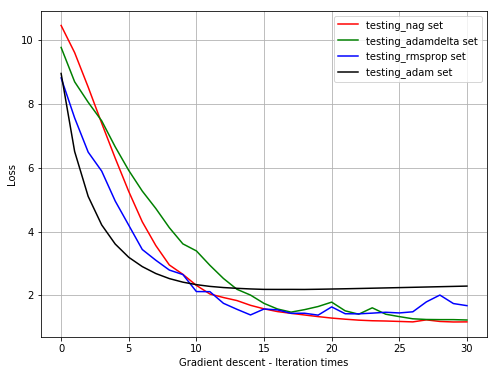

In [20]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import math

def get_data():
    data = load_svmlight_file("a9a.txt")
    return data[0], data[1]

def get_datat():
    data = load_svmlight_file("a9a.t")
    return data[0], data[1]




def f(x, w, b):
	f_result = 0
	x = np.ndarray.tolist(x)
	# print x
	for i in range(len(x[0])):
		f_result += x[0][i] * w[i]
	f_result += b
	return f_result



x_train,y_train=get_data()
x_test,y_test=get_datat()

b = 0
w=np.random.rand(123)
v=np.random.rand(123)*0
n=np.random.rand(123)*0
m=np.random.rand(123)*0
#nag lr=0.4

feature=123
x_train = x_train.todense()
x_test = x_test.todense()
x_train_len=len(x_train)
x_test_len=len(x_test)
a=0.7

loss = a*math.sqrt(sum([w[i] ** 2 for i in range(feature)])) +  sum([max(0, 1 - y_train[i] * f(x_train[i, :], w, b)) for i in range(x_train_len)])/x_train_len
	# print loss

#---------------------------------------NAG-----------------------------------------#
lr = 0.2
cnt = 0
train_loss = []
test_loss = []
while True:
    k=random.randint(0,32561)
    for i in range(122):
        gradient_aver = w[i]+a*v[i]+(-y_train[k])*(f(x_train[k,:],w,b)*y_train[k]<1)*x_train[k,i]
        
        
        v[i] = a*v[i]-lr*gradient_aver #nag
        w[i] += v[i] * lr #nag
    
        
        

    train_new_loss = a*math.sqrt(sum([w[i] ** 2 for i in range(feature)])) + sum([max(0, 1 - y_train[i] * f(x_train[i, :], w, b)) for i in range(x_train_len)])/x_train_len
    test_new_loss =a *math.sqrt(sum([w[i] ** 2 for i in range(feature)])) +  sum([max(0, 1 - y_test[i] * f(x_test[i, :], w, b)) for i in range(x_test_len)])/x_test_len
  

    if abs(loss - train_new_loss) > 0.0001:
        loss = train_new_loss
    train_loss.append(loss)
    test_loss.append(test_new_loss)
    cnt += 1
    if cnt > 30:
        break



#-----------------------------------Adadelta-----------------------------------------#

n=np.random.rand(123)*0
m=np.random.rand(123)*0
b = 0
w=np.random.rand(123)

loss2 = a*math.sqrt(sum([w[i] ** 2 for i in range(feature)])) +  sum([max(0, 1 - y_train[i] * f(x_train[i, :], w, b)) for i in range(x_train_len)])/x_train_len

lr = 0.05
cnt = 0
p=0.7
train_loss2 = []
test_loss2 = []
while True:
    k=random.randint(0,32561)
    for i in range(122):
        gradient_aver = w[i]+(-y_train[k])*(f(x_train[k,:],w,b)*y_train[k]<1)*x_train[k,i]
        
        
        
        n[i]= p*n[i]+(1-p)*((gradient_aver)**2)
        w[i] -= lr/math.sqrt(n[i]+0.0000000001)*gradient_aver
            
        
        
    train_new_loss2 = a*math.sqrt(sum([w[i] ** 2 for i in range(feature)])) + sum([max(0, 1 - y_train[i] * f(x_train[i, :], w, b)) for i in range(x_train_len)])/x_train_len
    test_new_loss2 =a *math.sqrt(sum([w[i] ** 2 for i in range(feature)])) +  sum([max(0, 1 - y_test[i] * f(x_test[i, :], w, b)) for i in range(x_test_len)])/x_test_len
    
        
    if abs(loss2 - train_new_loss2) > 0.0001:
        loss2 = train_new_loss2
    train_loss2.append(loss2)
    test_loss2.append(test_new_loss2)
    cnt += 1
    if cnt > 30:
        break

#------------------------------------------RMSProp----------------------------------------#
n=np.random.rand(123)*0
m=np.random.rand(123)*0
b = 0
w=np.random.rand(123)

loss3 = a*math.sqrt(sum([w[i] ** 2 for i in range(feature)])) +  sum([max(0, 1 - y_train[i] * f(x_train[i, :], w, b)) for i in range(x_train_len)])/x_train_len
p=0.5
lr = 0.07
cnt = 0
train_loss3 = []
test_loss3 = []
while True:
    k=random.randint(0,32561)
    for i in range(122):
        gradient_aver = w[i]+(-y_train[k])*(f(x_train[k,:],w,b)*y_train[k]<1)*x_train[k,i]
        
        
    
        n[i]= p*n[i]+(1-p)*((gradient_aver)**2)
        w[i] -= lr/math.sqrt(n[i]+0.0000000001)*gradient_aver
        
        

    train_new_loss3 = a*math.sqrt(sum([w[i] ** 2 for i in range(feature)])) + sum([max(0, 1 - y_train[i] * f(x_train[i, :], w, b)) for i in range(x_train_len)])/x_train_len
    test_new_loss3 =a *math.sqrt(sum([w[i] ** 2 for i in range(feature)])) +  sum([max(0, 1 - y_test[i] * f(x_test[i, :], w, b)) for i in range(x_test_len)])/x_test_len
   

    if abs(loss3 - train_new_loss3) > 0.0001:
        loss3 = train_new_loss3
    train_loss3.append(loss3)
    test_loss3.append(test_new_loss3)
    cnt += 1
    if cnt > 30:
        break




#------------------------------------------Adam-----------------------------------------#
n=np.random.rand(123)*0
m=np.random.rand(123)*0
m_t=m=np.random.rand(123)*0
n_t=m=np.random.rand(123)*0

p1=0.9
p2=0.99
b = 0
w=np.random.rand(123)

loss4 = a*math.sqrt(sum([w[i] ** 2 for i in range(feature)])) +  sum([max(0, 1 - y_train[i] * f(x_train[i, :], w, b)) for i in range(x_train_len)])/x_train_len

lr = 0.0046
cnt = 0
train_loss4 = []
test_loss4 = []

while True:
    cnt = cnt+1
    k=random.randint(0,32561)
    
    for i in range(122):
        gradient_aver = w[i]+(-y_train[k])*(f(x_train[k,:],w,b)*y_train[k]<1)*x_train[k,i]
        
       
        m[i] = p1*m[i]+(1-p1)*gradient_aver
        #m[i]=lr*math.sqrt(1-p2)/(1-p1)
        n[i] = p2*n[i]+(1-p2)*(gradient_aver**2)
        m_t[i] = m[i]/(1-p1**cnt)
        n_t[i]= n[i]/(1-p2**cnt)
        
        w[i]-= m_t[i]*lr/(math.sqrt(n[i])+0.0000001)
        
       

    train_new_loss4 = a*math.sqrt(sum([w[i] ** 2 for i in range(feature)])) + sum([max(0, 1 - y_train[i] * f(x_train[i, :], w, b)) for i in range(x_train_len)])/x_train_len
    test_new_loss4 =a *math.sqrt(sum([w[i] ** 2 for i in range(feature)])) +  sum([max(0, 1 - y_test[i] * f(x_test[i, :], w, b)) for i in range(x_test_len)])/x_test_len
   

    if abs(loss4 - train_new_loss4) > 0.0001:
        loss4 = train_new_loss4
    train_loss4.append(loss4)
    test_loss4.append(test_new_loss4)

    if cnt > 30:
        break






plt.figure(figsize=(8,6))
plt.xlabel('Gradient descent - Iteration times')
plt.ylabel('Loss')
plt.plot(range(cnt), test_loss, 'r-', label=u"testing_nag set")
plt.plot(range(cnt), test_loss2, 'g-', label=u"testing_adamdelta set")
plt.plot(range(cnt), test_loss3, 'b-', label=u"testing_rmsprop set")
plt.plot(range(cnt), test_loss4, 'k-', label=u"testing_adam set")

plt.legend()
plt.grid()
plt.show()
